## Importación de Bibliotecas

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns   
import pandas as pd
import numpy as np
import nltk

## Carga de Datos Limpios

In [2]:
df_compras=pd.read_csv('../data/clean_compras.csv')
df_compras.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


In [3]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NUM BEN       1540 non-null   int64  
 1   BENEFICIARIO  1540 non-null   object 
 2   RFC           1540 non-null   object 
 3   FACTURA       1540 non-null   object 
 4   CONTRATO      1540 non-null   object 
 5   CONCEPTO      1540 non-null   object 
 6   TIPO          1540 non-null   object 
 7   # OP          1540 non-null   float64
 8   FECHA         1540 non-null   object 
 9   IMPORTE       1540 non-null   float64
 10  SHEET         1540 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 132.5+ KB


## EDA - Exploratory Data Analysis

In [4]:
df_compras['FECHA'] = pd.to_datetime(df_compras['FECHA'], format='%Y-%m-%d')

In [5]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NUM BEN       1540 non-null   int64         
 1   BENEFICIARIO  1540 non-null   object        
 2   RFC           1540 non-null   object        
 3   FACTURA       1540 non-null   object        
 4   CONTRATO      1540 non-null   object        
 5   CONCEPTO      1540 non-null   object        
 6   TIPO          1540 non-null   object        
 7   # OP          1540 non-null   float64       
 8   FECHA         1540 non-null   datetime64[ns]
 9   IMPORTE       1540 non-null   float64       
 10  SHEET         1540 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 132.5+ KB


In [19]:
df_compras['# OP'].value_counts()

# OP
299001497.0    50
301000026.0    44
301000024.0    44
301000023.0    40
1019098.0      29
               ..
299001451.0     1
299001470.0     1
1019139.0       1
1019068.0       1
1104567.0       1
Name: count, Length: 655, dtype: int64

In [6]:
df_compras.isna().sum()

NUM BEN         0
BENEFICIARIO    0
RFC             0
FACTURA         0
CONTRATO        0
CONCEPTO        0
TIPO            0
# OP            0
FECHA           0
IMPORTE         0
SHEET           0
dtype: int64

In [7]:
df_compras.describe()

,NUM BEN,# OP,FECHA,IMPORTE
count,1540.000000,1.540000e+03,1540,1.540000e+03
mean,203914.777273,1.920050e+08,2020-12-13 11:22:35.844155648,6.263179e+05
min,110152.000000,1.019042e+06,2020-12-01 00:00:00,8.600000e-01
25%,116223.000000,1.019144e+06,2020-12-04 00:00:00,2.987000e+03
50%,203013.000000,2.980000e+08,2020-12-11 00:00:00,1.235584e+04
75%,311250.000000,3.000001e+08,2020-12-22 00:00:00,1.130583e+05
max,370012.000000,6.040001e+08,2020-12-31 00:00:00,1.267303e+08
std,92435.932025,1.411189e+08,NaN,4.666912e+06


In [8]:
df_compras.drop(columns=['NUM BEN', 'RFC'], axis=1, inplace=True)
df_compras.head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


### Analisis Univariado

In [62]:
print(df_compras['SHEET'].value_counts() )
print(df_compras['SHEET'].value_counts(normalize=True))

SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64
SHEET
CONTRATISTAS Y FDO FED    0.470130
GASTOS VARIOS             0.448052
COMUNICACION              0.046104
SERV. PERS.               0.029870
SERV PPROF                0.005844
Name: proportion, dtype: float64


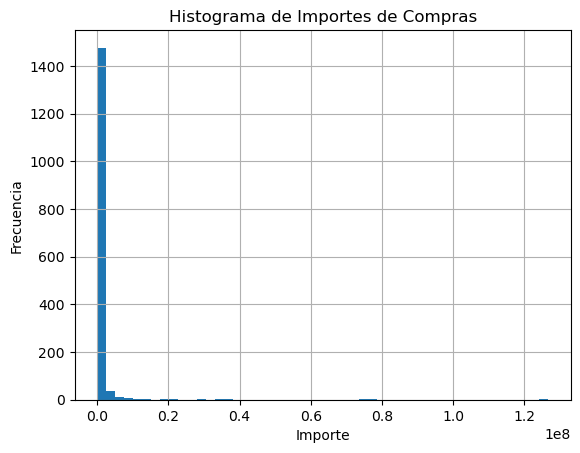

In [10]:
df_compras['IMPORTE'].hist(bins=50)
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.title('Histograma de Importes de Compras')
plt.show()

<Axes: >

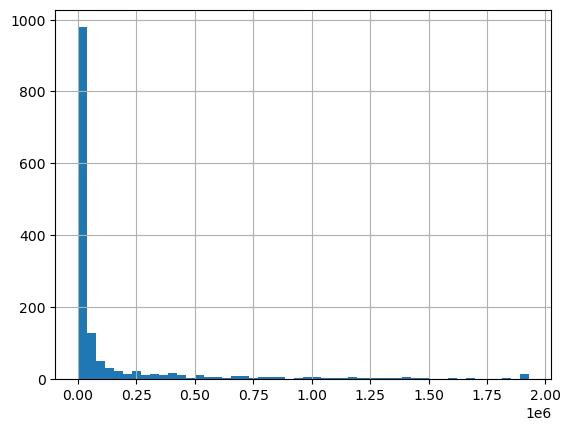

In [11]:
df_compras[df_compras['IMPORTE'] < df_compras['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [12]:
df_compras[df_compras['IMPORTE'] < df_compras['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


### Análisis Bivariado

#### Suma del Importes de Beneficiarios

In [56]:
suma_importes_beneficiarios = df_compras.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).reset_index().iloc[0:10]
suma_importes_beneficiarios.head(10)

,BENEFICIARIO,IMPORTE
0,MUNICIPIO DE LA CIUDAD DE MONTERREY,2.527236e+08
1,INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA...,1.356109e+08
2,"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE G...",4.382056e+07
3,"CAR ONE MONTERREY, S.A. DE C.V.",3.064431e+07
4,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",3.000000e+07
5,"SI VALE MEXICO, S.A. DE C.V.",2.600384e+07
6,"INTERASFALTOS, S.A. DE C.V.",2.404647e+07
7,"RED RECOLECTOR, S.A. DE C.V.",1.951267e+07
8,"SERVICIOS BROXEL, S.A.P.I. DE C.V.",1.941272e+07
9,"PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.",1.888003e+07


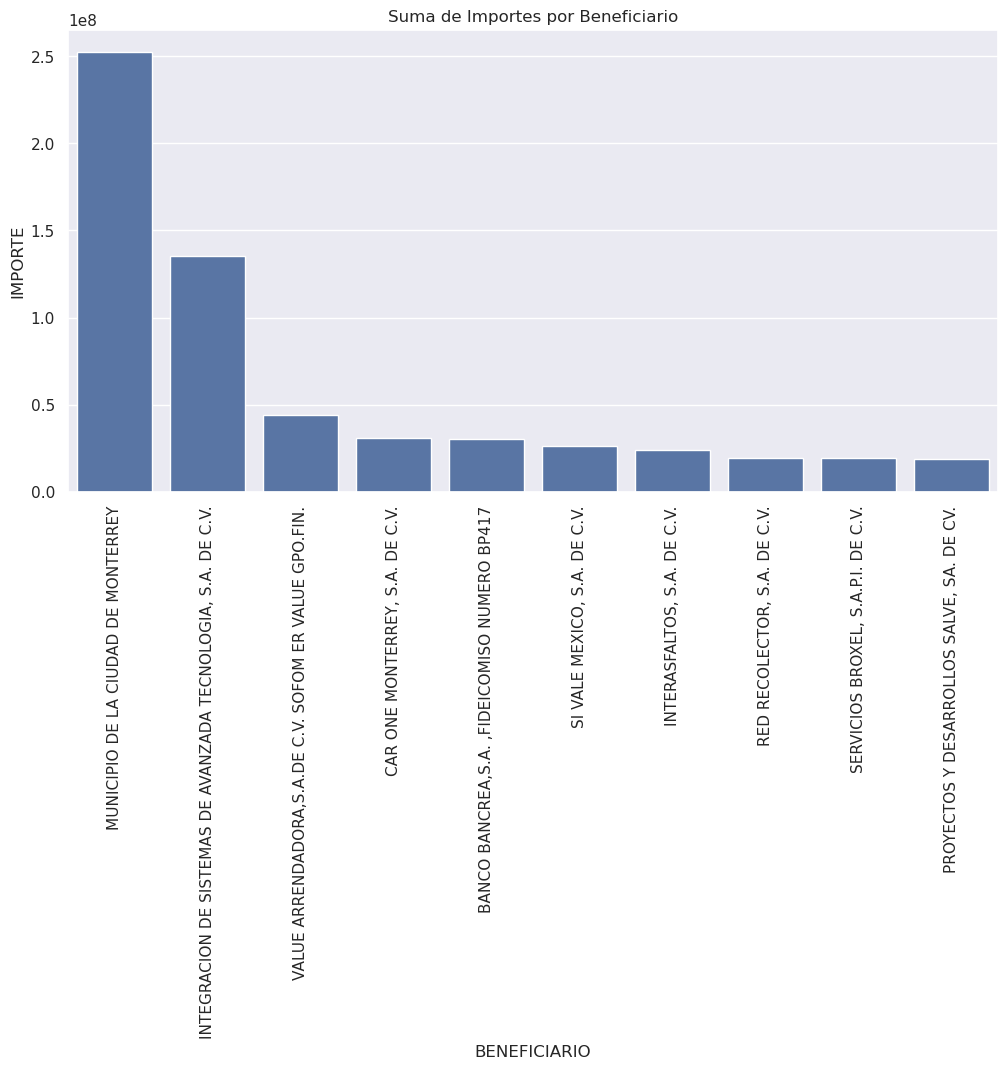

In [57]:
sns.barplot(x='BENEFICIARIO', y='IMPORTE', data=suma_importes_beneficiarios)
sns.set(rc={'figure.figsize':(12,6)})
plt.xticks(rotation=90)
plt.title('Suma de Importes por Beneficiario')
plt.show()

### Media de Importes por Tipo de Egreso

In [36]:
media_importes_tipos_egresos= df_compras.groupby('SHEET')['IMPORTE'].mean().sort_values(ascending=False).reset_index().iloc[0:10]
media_importes_tipos_egresos.head(10)

,SHEET,IMPORTE
0,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
2,SERV PPROF,229592.166667
3,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


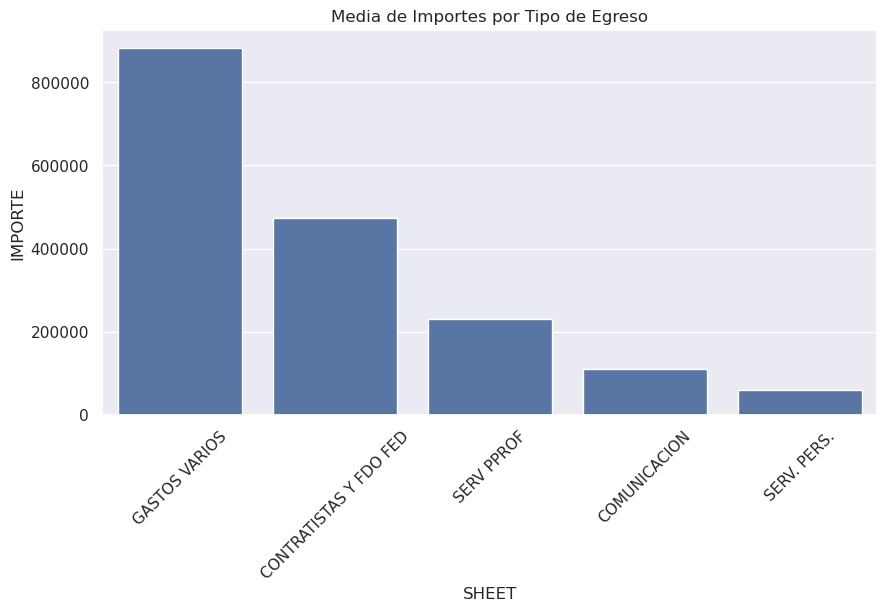

In [37]:
sns.barplot(x='SHEET', y='IMPORTE', data=media_importes_tipos_egresos)
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=45)
plt.title('Media de Importes por Tipo de Egreso')
plt.show()

### Suma de Importe por Beneficiario y Tipo de Egreso

In [67]:
suma_importes_beneficiarios=df_compras.groupby(['SHEET','BENEFICIARIO'])['IMPORTE'].sum().sort_values().unstack('SHEET')
suma_importes_beneficiarios.head()

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN


### Suma de Importes de Beneficiarios por Fecha

In [64]:
df_importes_fecha=df_compras.groupby(['FECHA','BENEFICIARIO'])['IMPORTE'].sum().reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]
df_importes_fecha.head()

,FECHA,BENEFICIARIO,IMPORTE
208,2020-12-17,MUNICIPIO DE LA CIUDAD DE MONTERREY,1.694630e+08
103,2020-12-08,INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA...,1.267303e+08
367,2020-12-28,MUNICIPIO DE LA CIUDAD DE MONTERREY,8.322629e+07
119,2020-12-11,"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",3.000000e+07
221,2020-12-18,"CAR ONE MONTERREY, S.A. DE C.V.",2.965508e+07


<Axes: xlabel='FECHA', ylabel='IMPORTE'>

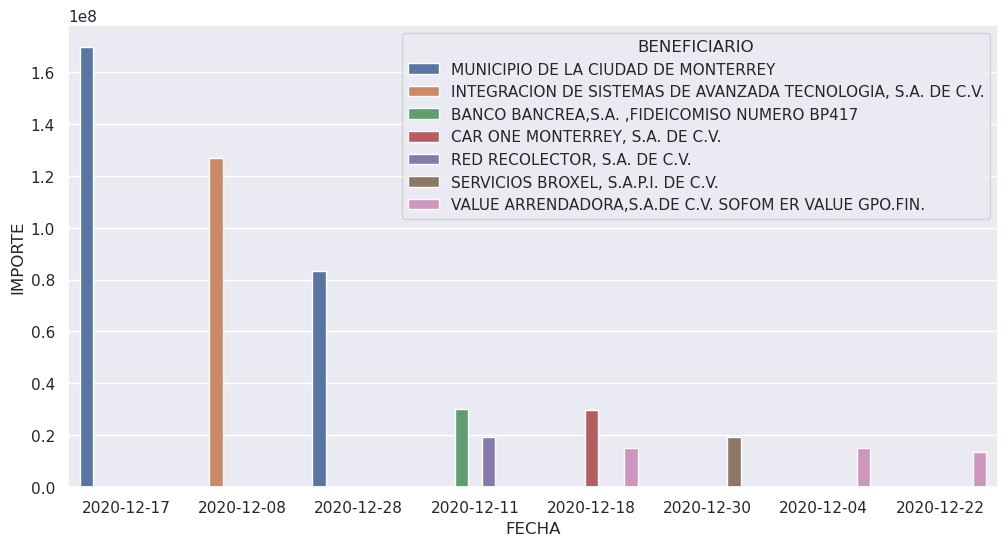

In [78]:
sns.barplot(x='FECHA', y='IMPORTE', data=df_importes_fecha, hue='BENEFICIARIO')

### Análisis de Texto

In [73]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jesusromero/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
textos_compras = ''
for row in df_compras['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [75]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [76]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

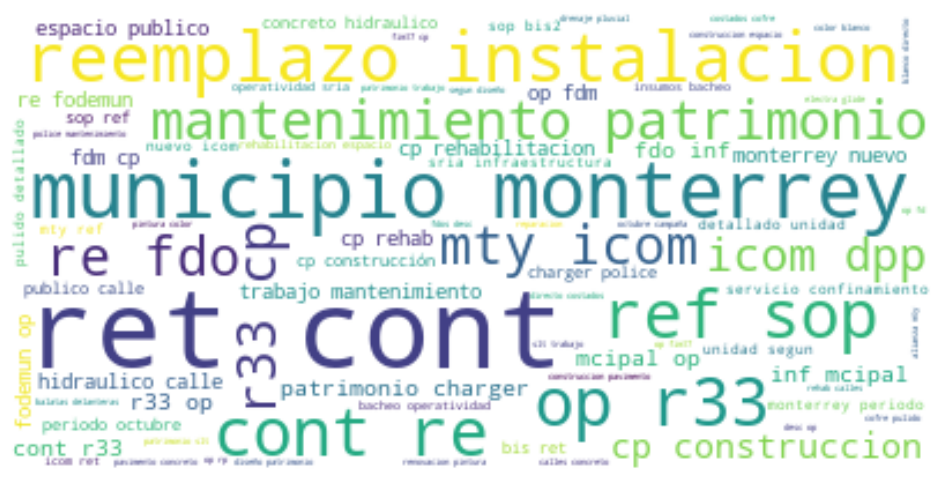

In [77]:
from wordcloud import WordCloud
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()